# Life Expectancy and Income in Australia

## Question

This small study aims to answer the question: *Is there are link between family income and life-expectancy in Australia?*

It is natural to assume than an individual’s income is linked to their life expectancy. Wealthy individuals can afford better healthcare and/or private health insurance. In 1984, however, the Hawke government introduced Medicare. This scheme gives Australians residents access to universal, publicly funded healthcare that either completely covers or heavily subsidises essential health treatments and consultations. Medicare was introduced based on the belief that good health in a universal right and should not depend an individual’s wealth. This study seeks to determining how well Medicare has gone about in achieving this outcome by determining if there still exists a correlation between the family income and life expectancy of Australian residents.

## Datasets

#### LGA15 Median Age at Death Categorised by Sex - 2010-2014

This dataset lists the median age-at-death (AAD) for all deaths occurring between 2010 and 2014 categorised by the Local Government Area (LGA).

*Source: Torrens University Australia - Public Health Information Development Unit*

#### LGA11-based B02 Selected Medians and Averages as at 2011-08-11

Contains summary data (medians and means) from the 2011 Australian Census.

*Source: The Australian Bureau of Statistics based on data from the 2011 Census*

## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Import data into DataFrame
lga_averages = pd.read_csv('LGA11_averages_2011.csv',encoding = 'ISO-8859-1')
lga_AAD = pd.read_csv('LGA15_median_AAD_2011_2014.csv',encoding = 'ISO-8859-1')
lga_fam_count = pd.read_csv('LGA_family_count.csv',encoding = 'ISO-8859-1')

In [3]:
# Create new column for median family income per family memeber
lga_averages['med_income_pfm'] = lga_averages['tot_fam_inc_weekly'] / lga_averages['mean_household_size']

## Integration

In [4]:
# Merge the datasets by LGA using an inner join
integrated = pd.merge(lga_averages, lga_AAD, on='lga_code', how='inner')
integrated = pd.merge(integrated, lga_fam_count, on='lga_code', how='inner')

In [5]:
# Drop duplicate column
integrated = integrated.drop(columns=['lga_name_y'])

In [6]:
# Create another DataFrame with no rows from the ACT
no_act = integrated[integrated.ste_name != 'act']

In [7]:
# Drop rows with missing values in median AAD or median total famil income
integrated = integrated.dropna(subset=['dth_p_med_age', 'tot_fam_inc_weekly'])

## Analysis

### Caveats

An ideal dataset for this study would contain the AAD for all the individual Australians who died in a given period and their total income throughout their life. Since such a dataset is not easily obtainable we compromise by only looking at the median age at death and family income categorised by the LGA (Local Government Area) where the individuals of interest lived.

An important thing to note when analysing our chosen datasets as opposed to this hypothetical ideal dataset is that the population of each LGA varies drastically. As such we need to employ various techniques to account for these variations. E.g. the bubble sizing in the scatter plot below.

### Correlation

This scatter plot shows Median Total Family Income versus Median Age At Death (with the bubble size representing the LGAs total family count). It reveals a possible correlation between these two variables. As the median total family income increases the median AAD appears as if it tends upwards as well.

Text(0,0.5,'Median Age At Death')

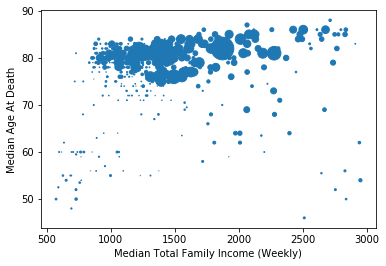

In [8]:
# Plotting Median Family Income versus Median Age At Death with weighting by population
plt = integrated.plot(kind='scatter', x='tot_fam_inc_weekly', y='dth_p_med_age', s=integrated['tot_famalies']/200)
plt.set_xlabel('Median Total Family Income (Weekly)')
plt.set_ylabel('Median Age At Death')

If a correlation does exist however there are a lot of outliers and the errors appear to be quite high. We should still keep in mind that low Pearson's correlation coefficient does not necessarily mean that a correlation does not exist.

In [9]:
integrated['tot_fam_inc_weekly'].corr(integrated['dth_p_med_age'])

0.13197392104724212

### Correlation by State

Below is a more detailed version of the first scatter plot albeit without weightings. The colours represent the different states and the length of the regression line shows the income range for that state.

There are several very interesting trends that cause us to call into question the link between family income and life-expectancy.

Firstly, the regression line for the state of South Australia (purple) trends slightly downwards. This completely contradicts our hypothesis that as family income increases so does life-expectancy.

Secondly the life-expectancy of families living in the Northern Territory is substantially lower than that of families living in the other states. While the median total family income of NT residents appears to be lower too, whether this difference is significant is hard to say. Perhaps geography has a much larger impact on life-expectancy than income.

*Note: The ACT has been dropped from these plots as it only contains one LGA and therefore does not have enough data to observe trends.*

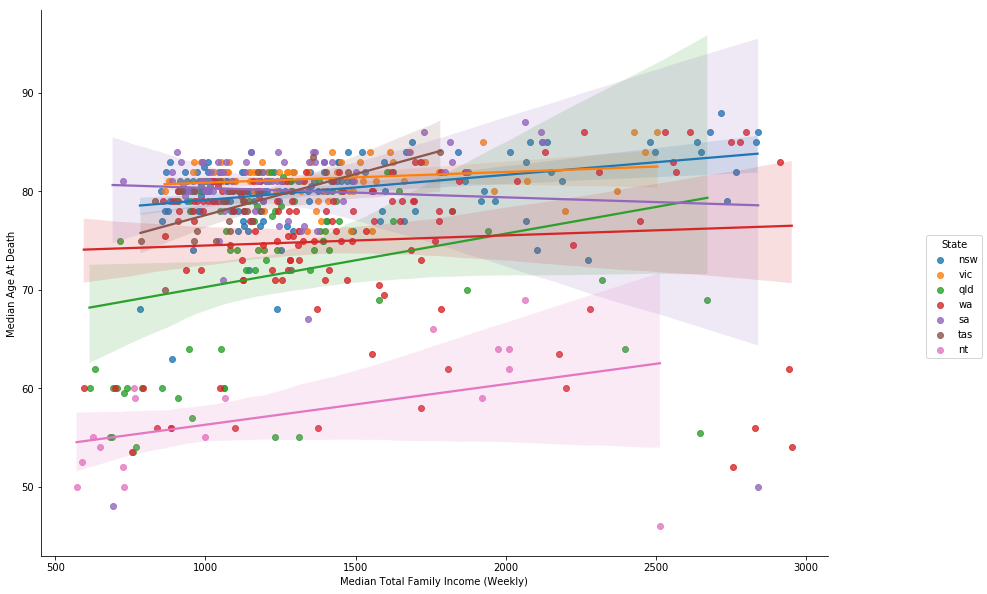

In [10]:
# Plotting Median Family Income versus Median Age At Death with regression line
plt = sns.lmplot(x='tot_fam_inc_weekly', y='dth_p_med_age', data=no_act, hue="ste_name", fit_reg=True, truncate=True)
plt._legend.set_title('State')
plt.set(xlabel='Median Total Family Income (Weekly)', ylabel='Median Age At Death')
plt.fig.set_size_inches(15,9)

The box plots below support our observations above. The AAD of NT residents is much lower than other state while the total family income is also lower but not by a lot.

[Text(0,0.5,'State'), Text(0.5,0,'Median Age At Death')]

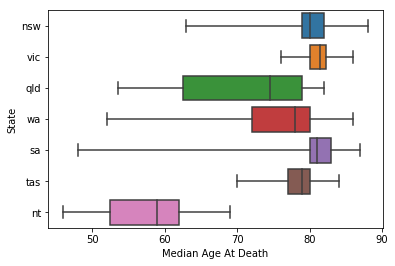

In [11]:
# Box plot of Median AAD by State
plt = sns.boxplot(x="dth_p_med_age", y="ste_name", data=no_act, whis=np.inf)
plt.set(xlabel='Median Age At Death', ylabel='State')

[Text(0,0.5,'State'), Text(0.5,0,'Median Total Family Income (Weekly)')]

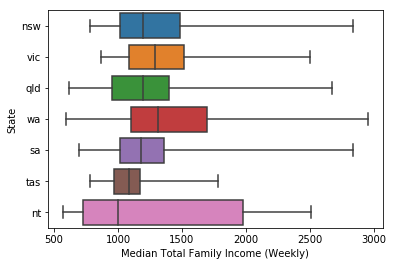

In [12]:
# Box plot of Median Family Income by State
plt = sns.boxplot(x="tot_fam_inc_weekly", y="ste_name", data=no_act, whis=np.inf)
plt.set(xlabel='Median Total Family Income (Weekly)', ylabel='State')

### Confounding Variable

The NT's much lower AAD calls our attention to a possible confounding variable. Perhaps there is a correlation between an LGA’s population and its median AAD? A larger population would suggest that LGA is closer to a major city and therefore has easier access to medical facilities. Living close to a major city might also be correlated with higher paying jobs.

If an LGA’s total population is correlated with both its median AAD and its median family income that would mean that any correlation between median AAD and median family income would at least be partially explained by population rather than being an entirely causal relationship.

Text(0,0.5,'Median Age At Death')

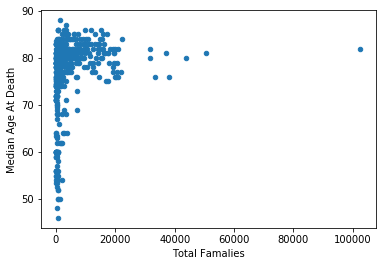

In [13]:
# Plotting Total Famalies versus Median Age At Death
plt = integrated.plot(kind='scatter', x='tot_famalies', y='dth_p_med_age')
plt.set_xlabel('Total Famalies')
plt.set_ylabel('Median Age At Death')

Text(0,0.5,'Median Total Family Income (Weekly)')

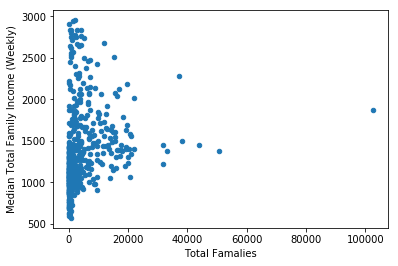

In [14]:
# Plotting Total Famalies versus Median Age At Death
plt = integrated.plot(kind='scatter', x='tot_famalies', y='tot_fam_inc_weekly')
plt.set_xlabel('Total Famalies')
plt.set_ylabel('Median Total Family Income (Weekly)')

Further exploration of the LGA populations reveals that while there is possibly a correlation between total families and median AAD there appears to be no correlation at all between total families and median family income. I.e. LGA population is perhaps a predictor of life-expectancy but not of family income. This rules out population as a confounding variable in explaining the link between median family income and median AAD.

## Hypothesis Testing

While the scatter plots and box polts above help us to visualise the data and identify trends, it is ill-advised to draw any conclusion by simply looking at them. Firstly our intuitions are subjective, some people may see a trend while others don't. Secondly, as alluded to above, simply because the errors are high and there are many outliers does not mean that a trend does not exist. To come to an informed conclusion we must perform a hypothesis test.

### Model

Y = Β0 + Β1X

Where Y is the median AAD and X is the median total family income.

### Hypotheses

**Ho: Β1 = 0**

There is no relationship between median total family income median AAD.

**Ha: Β1 ≠ 0**

The is a link (positive or negative) between median total family income median AAD.

### Weighting

The code below creates a new weighted DataFrame by multiplying each row, representing a single LGA, by that LGA's population. This improves the validity of our hypothesis test by lessening the impact of LGA outliers with very small population as observed in the first scatter plot.

In [15]:
# Create a new DataFrame which takes LGA populations into account
weighted_df = pd.DataFrame(columns=['med_AAD', 'med_inc'], dtype=int)

for index, row in integrated.iterrows():
    population = int(round(row['tot_famalies'] / 100))
    
    if population > 0:
        lga = pd.DataFrame(columns=['med_AAD', 'med_inc'])
        lga = pd.concat([pd.DataFrame([[row['dth_p_med_age'], row['tot_fam_inc_weekly']]], columns=['med_AAD', 'med_inc']) for i in range(population)])
        weighted_df = weighted_df.append(lga)

In [16]:
X = weighted_df['med_inc']
Y = weighted_df['med_AAD']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                med_AAD   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     492.1
Date:                Sat, 14 Jul 2018   Prob (F-statistic):          7.29e-108
Time:                        02:33:01   Log-Likelihood:                -61765.
No. Observations:               22168   AIC:                         1.235e+05
Df Residuals:                   22166   BIC:                         1.235e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.9027      0.105    744.641      0.000      77.698      78.108
med_inc        0.0015   6.55e-05     22.184      0.000       0.001       0.002
==============================================================================
Omnibus:                    16192.157   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           339878.554
Skew:                          -3.336   Prob(JB):                         0.00
Kurtosis:                      20.985   Cond. No.                     6.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Results

The P-Value for our two-tailed test is 0.000. This is the probability that the coefficient Β1 would be greater than or equal to 0.0015 by random chance if H0 were true. This is a definitive result, we must reject the null hypothesis H0 and conclude that median AAD and median total family income are positively correlated.

This result contradicts our observations about but emphasises the importance of hypothesis testing. Even though the Pearson's correlation coefficient was so low and the outliers numerous a relationship does exist.

## Question Resolution

Even after the introduction of Medicare in Australia, wealthier families do still tend to live longer.

However we must keep several things in mind when interpreting this result.

Firstly the coefficient of the X variable was 0.0015. This means that for every $100 increase in weekly total family income there is only a 54.75 day increase in life-expectancy. So even though wealthy families do live longer, it is not by much.

Secondly, our linear regression model was extrapolated from summary statistics. Although we weighted the data before performing our hypothesis test this method ignores outliers within individual LGAs as we only possessed data on LGA medians. It is hard to determine what effect this had on our result.

Finally, although total family income and AAD are correlated we have not determined whether the relationship is causal. There are countless confounding variables that may have an impact on life-expectancy but which are also correlated with family income. If we had more data on these confounding variables we would have been able to establish with more certainty whether the relationship was causal using a multiple linear regression model.